In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from pytexshade import ipyshade
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

In [3]:
#Let's get SEQREC sequences
#Another way if from fasta files provided by PDB
# We get SEQRECORDS  NOTE - these are provided by authors
# and usually contain parts unresolved in 3D
from Bio import SeqIO
import urllib.request
!curl 'https://www.rcsb.org/pdb/download/downloadFastaFiles.do?structureIdList=5Z3L&compressionType=uncompressed'> temp.fasta
records = SeqIO.parse('temp.fasta', "fasta")
chseq_seqrec={}
for r in records:
    chseq_seqrec.update({r.id.split('|')[0].split(':')[1]:r.seq})
chseq_seqrec

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2396    0  2396    0     0   4270      0 --:--:-- --:--:-- --:--:--  4270


{'A': Seq('ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRY...ERA', SingleLetterAlphabet()),
 'B': Seq('SGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEET...FGG', SingleLetterAlphabet()),
 'C': Seq('SGRGKQGGKTRAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAV...KSK', SingleLetterAlphabet()),
 'D': Seq('AKSAPAPKKGSKKAVTKTQKKDGKKRRKTRKESYAIYVYKVLKQVHPDTGISSK...SAK', SingleLetterAlphabet()),
 'E': Seq('ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRY...ERA', SingleLetterAlphabet()),
 'F': Seq('SGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEET...FGG', SingleLetterAlphabet()),
 'G': Seq('SGRGKQGGKTRAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAV...KSK', SingleLetterAlphabet()),
 'H': Seq('AKSAPAPKKGSKKAVTKTQKKDGKKRRKTRKESYAIYVYKVLKQVHPDTGISSK...SAK', SingleLetterAlphabet()),
 'I': Seq('ATCGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACC...GAT', SingleLetterAlphabet()),
 'J': Seq('ATCGTACTTCTCGACAAGCTTCAGGATGTATATATCTGACACGTGCCTGGAGAC...GAT', SingleLetterAlphabet()),
 'O': Seq(

In [5]:
%%bash --out output --err error
mkdir -p tmp
cd tmp
wget https://files.rcsb.org/view/5Z3L.pdb

In [53]:
#Prepare a Multiple Sequence Alignment in biopython
human_h2a_z_core=Seq('SRSQRAGLQFPVGRIHRHLKSRTTSHGRVGATAAVYSAAILEYLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLI-KATIAGGGVIPHIHKSLIG')
xenopus_h2a_core=Seq('TRSSRAGLQFPVGRVHRLLRKGNYAE-RVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLP')
msa=MultipleSeqAlignment([SeqRecord(xenopus_h2a_core,id='H2A',name='H2A'),SeqRecord(human_h2a_z_core,id='H2AZ',name='H2AZ')])


In [110]:
#Prepare a Multiple Sequence Alignment in biopython
msa=MultipleSeqAlignment([SeqRecord(chseq_seqrec['O'],id='Snf2',name='Snf2')])



In [75]:
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP, dssp_dict_from_pdb_file
# p = PDBParser()
# structure = p.get_structure("5Z3L", "tmp/5Z3L.pdb")
# model = structure[0]
dssp = dssp_dict_from_pdb_file("tmp/5Z3L.pdb")

In [82]:
dssp[1]

[('A', (' ', 37, ' ')),
 ('A', (' ', 38, ' ')),
 ('A', (' ', 39, ' ')),
 ('A', (' ', 40, ' ')),
 ('A', (' ', 41, ' ')),
 ('A', (' ', 42, ' ')),
 ('A', (' ', 43, ' ')),
 ('A', (' ', 44, ' ')),
 ('A', (' ', 45, ' ')),
 ('A', (' ', 46, ' ')),
 ('A', (' ', 47, ' ')),
 ('A', (' ', 48, ' ')),
 ('A', (' ', 49, ' ')),
 ('A', (' ', 50, ' ')),
 ('A', (' ', 51, ' ')),
 ('A', (' ', 52, ' ')),
 ('A', (' ', 53, ' ')),
 ('A', (' ', 54, ' ')),
 ('A', (' ', 55, ' ')),
 ('A', (' ', 56, ' ')),
 ('A', (' ', 57, ' ')),
 ('A', (' ', 58, ' ')),
 ('A', (' ', 59, ' ')),
 ('A', (' ', 60, ' ')),
 ('A', (' ', 61, ' ')),
 ('A', (' ', 62, ' ')),
 ('A', (' ', 63, ' ')),
 ('A', (' ', 64, ' ')),
 ('A', (' ', 65, ' ')),
 ('A', (' ', 66, ' ')),
 ('A', (' ', 67, ' ')),
 ('A', (' ', 68, ' ')),
 ('A', (' ', 69, ' ')),
 ('A', (' ', 70, ' ')),
 ('A', (' ', 71, ' ')),
 ('A', (' ', 72, ' ')),
 ('A', (' ', 73, ' ')),
 ('A', (' ', 74, ' ')),
 ('A', (' ', 75, ' ')),
 ('A', (' ', 76, ' ')),
 ('A', (' ', 77, ' ')),
 ('A', (' ', 78,

In [83]:
for i in dssp[1]:
    print(dssp[0][i])

('K', '-', 146, 360.0, 120.8, 1, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0)
('P', '-', 131, -64.6, 179.1, 2, 0, 0.0, 2, -0.4, 0, 0.0, 0, 0.0)
('H', '-', 146, -106.8, 138.0, 3, 2, -0.0, 2, -0.2, 0, 0.0, 0, 0.0)
('R', '-', 207, -144.8, -169.2, 4, -2, -0.4, 2, -0.3, 0, 0.0, 0, 0.0)
('Y', '-', 133, -138.4, 155.9, 5, -2, -0.2, 3, -0.1, 0, 0.0, -2, -0.0)
('R', '-', 201, -64.0, 140.6, 6, -2, -0.3, 3, -1.7, 1, -0.1, 4, -0.6)
('P', 'T', 124, -60.5, 129.8, 7, 0, 0.0, -1, -0.1, 0, 0.0, 0, 0.0)
('G', 'T', 29, 102.2, -22.9, 8, -2, -0.1, 4, -1.6, -3, -0.1, 5, -0.1)
('T', 'H', 62, -70.0, -44.3, 9, -3, -1.7, 4, -2.5, 2, -0.2, 5, -0.2)
('V', 'H', 52, -55.3, -37.5, 10, -4, -0.6, 4, -2.7, 1, -0.2, -1, -0.2)
('A', 'H', 9, -63.2, -39.8, 11, 2, -0.2, 4, -2.8, 1, -0.2, -1, -0.2)
('L', 'H', 27, -61.1, -48.3, 12, -4, -1.6, 4, -2.6, 2, -0.2, 5, -0.2)
('R', 'H', 110, -60.9, -42.2, 13, -4, -2.5, 4, -2.2, 2, -0.2, -2, -0.2)
('E', 'H', 34, -56.1, -62.8, 14, -4, -2.7, 4, -2.6, 2, -0.2, 3, -0.4)
('I', 'H', 11, -49.4, -41.6, 15,

tempfile created:  /tmp/tmp6g0jmxfc.png
Created temporaty directory:  /tmp/tmpigmhbe10
Created temporaty directory:  /tmp/tmpcs790ral
Chosen splitting parameters
2 20
DEBUG: copying fasta file in current folder for analysis
mkdir -p debug && cp /tmp/tmpcs790ral/alignment0.fasta debug/alignment0.fasta
{}
DEBUG: copying tex file in current folder for analysis
mkdir -p debug && cp /tmp/tmpcs790ral/align.tex debug/align.tex
Launcning Tectonic:
tectonic /tmp/tmpcs790ral/align.tex 2>&1
note: this is a BETA release; ask questions and report bugs at https://tectonic.newton.cx/
Running TeX ...
Rerunning TeX because "align.aux" changed ...
Running xdvipdfmx ...
Writing /tmp/tmpcs790ral/align.pdf (15503 bytes)
Skipped writing 2 intermediate files (use --keep-intermediates to keep them)

mv /tmp/tmpcs790ral/align.pdf /tmp/tmpigmhbe10/tempshade.pdf
DEBUG: copying pdf in current folder for analysis
mkdir -p debug && cp /tmp/tmpigmhbe10/tempshade.pdf debug/tempshade.pdf
Converting PDF to PNG
convert 

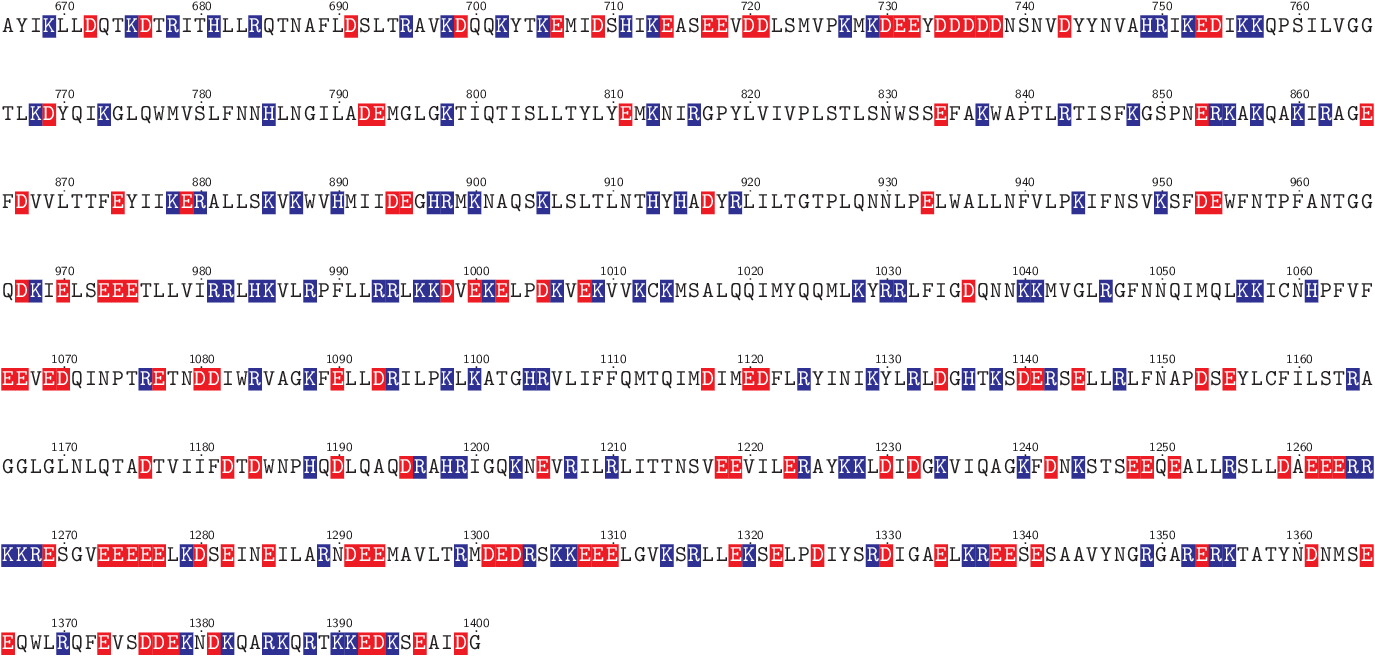

In [138]:
#Shade
ipyshade.shadedmsa(msa,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=[],title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[1,10000], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=True, # Add a ruler\
     show_seq_names=False,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     resperline=100, startnumber=666, debug = False
    )

In [116]:
from Bio import Entrez
Entrez.email = "alex@intbio.org"  # Always tell NCBI who you are
handle = Entrez.efetch(db="protein", id="5Z3L_O", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")

In [117]:
record

SeqRecord(seq=Seq('AYIKLLDQTKDTRITHLLRQTNAFLDSLTRAVKDQQKYTKEMIDSHIKEASEEV...IDG', IUPACProtein()), id='5Z3L_O', name='5Z3L_O', description='Chain O, Transcription regulatory protein SNF2', dbxrefs=[])

In [118]:
from pytexshade.shade import seqfeat2shadefeat

In [127]:
msar=MultipleSeqAlignment([record])

In [161]:
msar[0].id='A5Z3L_P'

In [175]:
feat=seqfeat2shadefeat(msar,debug=False)

In [176]:
feat

[{'style': 'helix', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(77), 84]},
 {'style': '---',
  'seqref': 'A5Z3L-P',
  'sel': [ExactPosition(92), 631],
  'color': 'black',
  'text': 'PLN03142',
  'position': 'bottom'},
 {'style': '---',
  'seqref': 'A5Z3L-P',
  'sel': [ExactPosition(94), 601],
  'color': 'black',
  'text': 'Domain 3',
  'position': 'bottom'},
 {'style': 'helix', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(103), 116]},
 {'style': 'sheet', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(121), 125]},
 {'style': 'helix', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(132), 145]},
 {'style': 'sheet', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(152), 158]},
 {'style': 'helix', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(161), 169]},
 {'style': 'sheet', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(177), 181]},
 {'style': 'helix', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(189), 196]},
 {'style': 'sheet', 'seqref': 'A5Z3L-P', 'sel': [ExactPosition(201), 207]},
 {'style': 'sheet', 'seqref': 'A

tempfile created:  /tmp/tmp_4jc0mus.png
Created temporaty directory:  /tmp/tmpic0ffa0x
Created temporaty directory:  /tmp/tmphddlrw48
Chosen splitting parameters
2 20
DEBUG: copying fasta file in current folder for analysis
mkdir -p debug && cp /tmp/tmphddlrw48/alignment0.fasta debug/alignment0.fasta
{'A5Z3L-P': '\\feature{top}{A5Z3L-P}{78..85}{helix}{}\\feature{bottom}{A5Z3L-P}{93..632}{---}{PLN03142}\\feature{bottom}{A5Z3L-P}{95..602}{---}{Domain 3}\\feature{top}{A5Z3L-P}{104..117}{helix}{}\\feature{top}{A5Z3L-P}{122..126}{-->}{}\\feature{top}{A5Z3L-P}{133..146}{helix}{}\\feature{top}{A5Z3L-P}{153..159}{-->}{}\\feature{top}{A5Z3L-P}{162..170}{helix}{}\\feature{top}{A5Z3L-P}{178..182}{-->}{}\\feature{top}{A5Z3L-P}{190..197}{helix}{}\\feature{top}{A5Z3L-P}{202..208}{-->}{}\\feature{top}{A5Z3L-P}{224..230}{-->}{}\\feature{top}{A5Z3L-P}{241..248}{helix}{}\\feature{top}{A5Z3L-P}{252..258}{-->}{}\\feature{top}{A5Z3L-P}{312..322}{helix}{}\\feature{top}{A5Z3L-P}{325..328}{-->}{}\\feature{bot

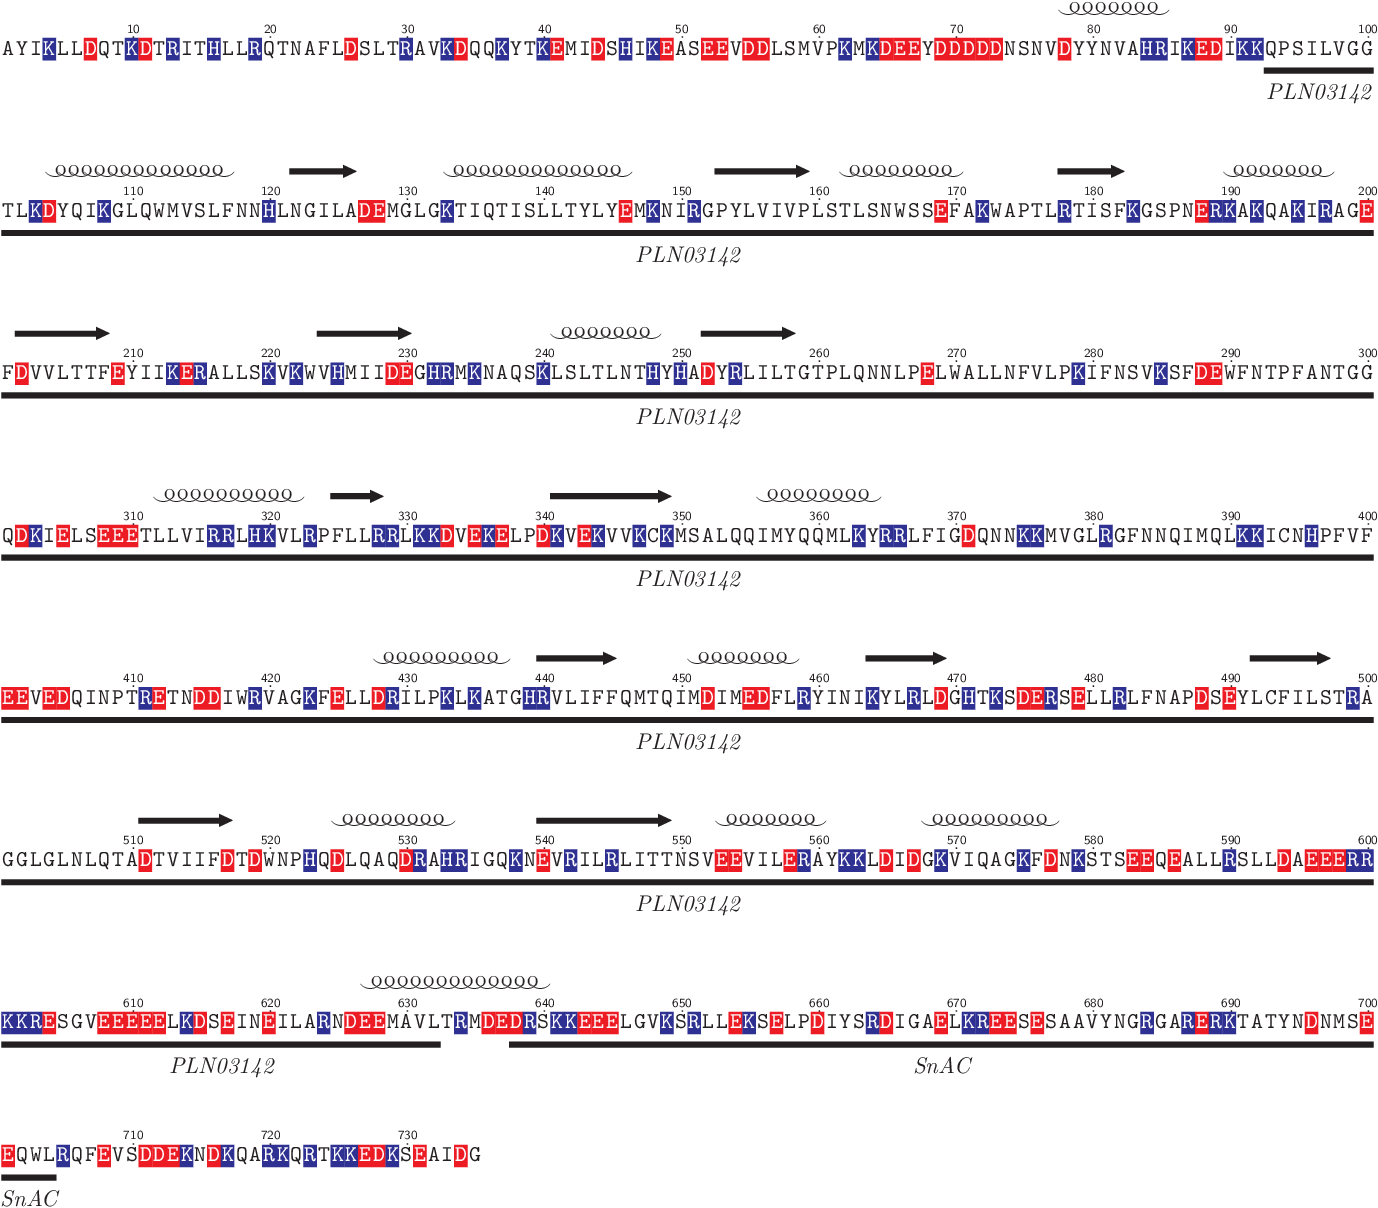

In [178]:
#Shade
ipyshade.shadedmsa(msar,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=feat,title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[1,10000], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=True, # Add a ruler\
     show_seq_names=False,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     resperline=100, startnumber=1, debug = True
    )

In [171]:
msar[0].id=msar[0].id.replace('_','-')

In [135]:
msar[0]

SeqRecord(seq=Seq('AYIKLLDQTKDTRITHLLRQTNAFLDSLTRAVKDQQKYTKEMIDSHIKEASEEV...IDG', IUPACProtein()), id='5Z3L-O', name='5Z3L_O', description='Chain O, Transcription regulatory protein SNF2', dbxrefs=[])

In [136]:
len(msa)

1